In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
project =pd.read_csv("/content/Fraud.csv")

In [3]:
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545326 entries, 0 to 545325
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            545326 non-null  int64  
 1   type            545326 non-null  object 
 2   amount          545326 non-null  float64
 3   nameOrig        545326 non-null  object 
 4   oldbalanceOrg   545326 non-null  float64
 5   newbalanceOrig  545326 non-null  float64
 6   nameDest        545326 non-null  object 
 7   oldbalanceDest  545325 non-null  float64
 8   newbalanceDest  545325 non-null  float64
 9   isFraud         545325 non-null  float64
 10  isFlaggedFraud  545325 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 45.8+ MB


In [4]:
project.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [5]:
project.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,545326.000000,5.453260e+05,5.453260e+05,5.453260e+05,5.453250e+05,5.453250e+05,545325.000000,545325.0
mean,14.435589,1.628503e+05,9.032147e+05,9.229918e+05,9.793806e+05,1.150675e+06,0.000440,0.0
std,3.983863,2.676955e+05,3.000850e+06,3.037953e+06,2.327064e+06,2.492859e+06,0.020974,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,11.000000,1.289251e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,15.000000,7.882464e+04,1.828950e+04,0.000000e+00,1.196612e+05,2.168552e+05,0.000000,0.0
75%,18.000000,2.177040e+05,1.634999e+05,2.027670e+05,8.960546e+05,1.187108e+06,0.000000,0.0
max,21.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.148270e+07,4.148270e+07,1.000000,0.0


In [7]:
project.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,1
newbalanceDest,1
isFraud,1


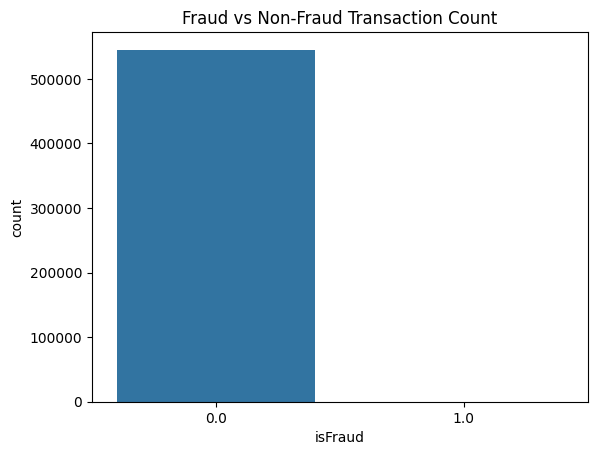

isFraud
0.0    545085
1.0       240
Name: count, dtype: int64
isFraud
0.0    99.955806
1.0     0.044010
Name: count, dtype: float64


In [8]:
 import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='isFraud', data=project)
plt.title('Fraud vs Non-Fraud Transaction Count')
plt.show()

fraud_counts = project['isFraud'].value_counts()
print(fraud_counts)
print(fraud_counts / len(project) * 100)


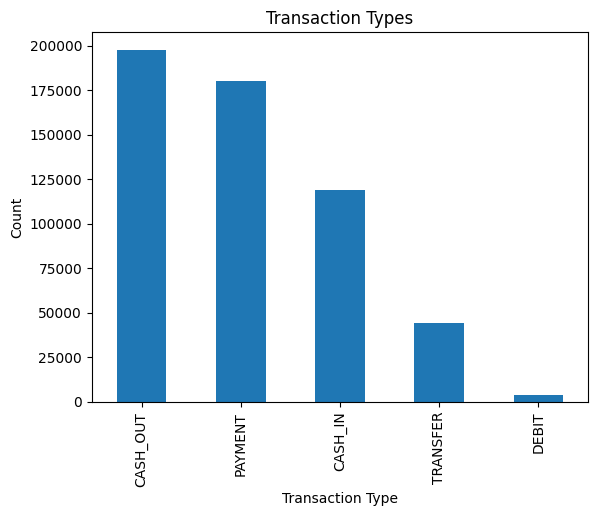

In [10]:
project['type'].value_counts().plot(kind='bar', title='Transaction Types')
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()


In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
project['type'] = le.fit_transform(project['type'])


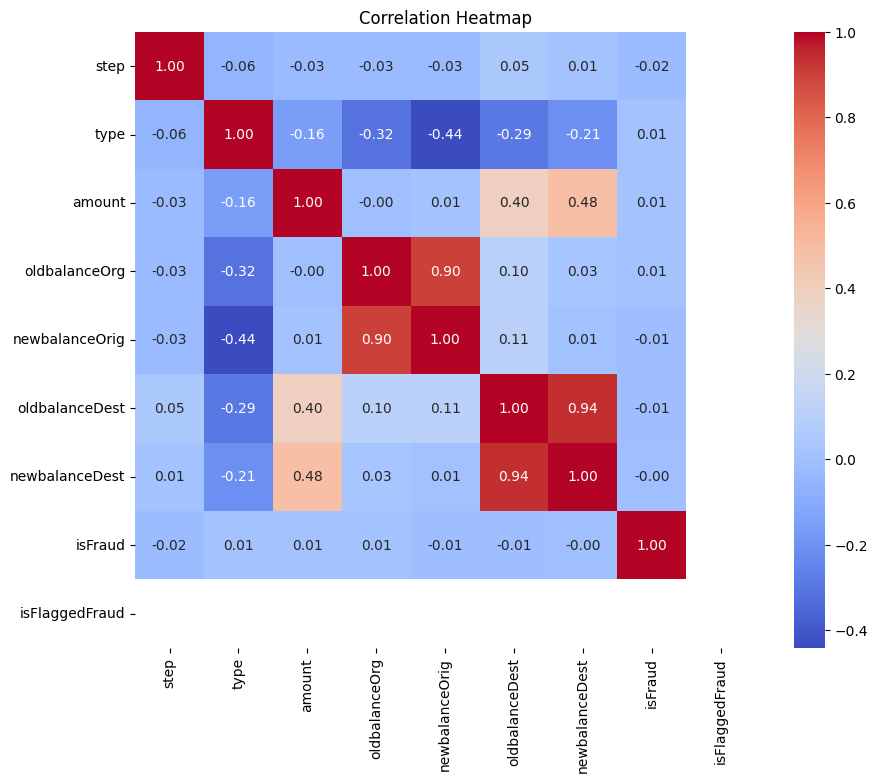

In [18]:
import seaborn as sns

corr = project.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [19]:
project.isnull().sum()


,0
step,0
type,0
amount,0
oldbalanceOrg,0
newbalanceOrig,0
oldbalanceDest,1
newbalanceDest,1
isFraud,1
isFlaggedFraud,1


In [20]:
project.fillna(project.median(numeric_only=True), inplace=True)


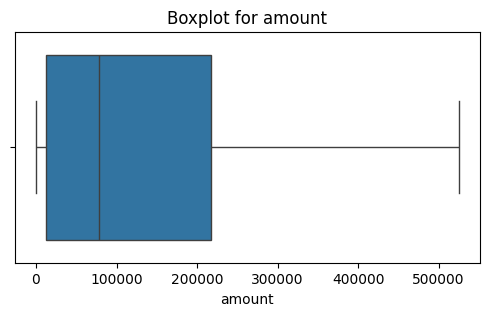

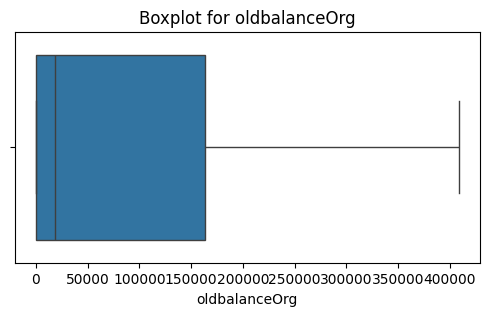

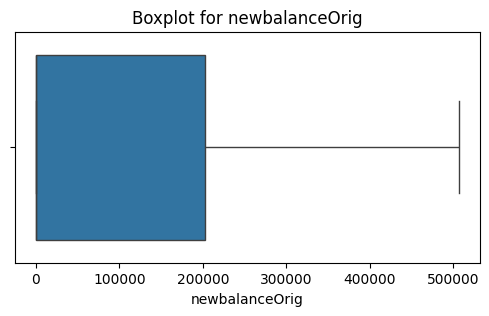

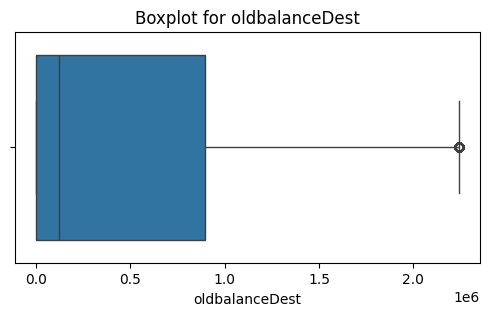

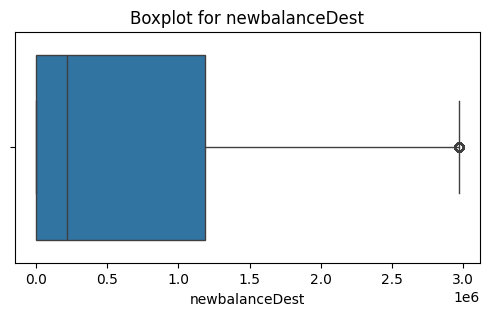

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for col in cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=project[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [22]:
for col in cols:
    Q1 = project[col].quantile(0.25)
    Q3 = project[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    project[col] = project[col].clip(lower, upper)


In [23]:
X = project.drop('isFraud', axis=1)


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Add constant to dataset
X_const = add_constant(X)

# Calculate VIF
vif = pd.DataFrame()
vif["features"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif)


         features        VIF
0           const  21.013663
1            step   1.019886
2            type   1.435244
3          amount   1.389357
4   oldbalanceOrg   5.804164
5  newbalanceOrig   6.709264
6  oldbalanceDest  10.393262
7  newbalanceDest  11.115017
8  isFlaggedFraud        NaN


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [25]:
X = X.drop('newbalanceDest', axis=1)


In [26]:
y = project['isFraud']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [28]:
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]


In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    109018
         1.0       0.72      0.27      0.39        48

    accuracy                           1.00    109066
   macro avg       0.86      0.64      0.70    109066
weighted avg       1.00      1.00      1.00    109066



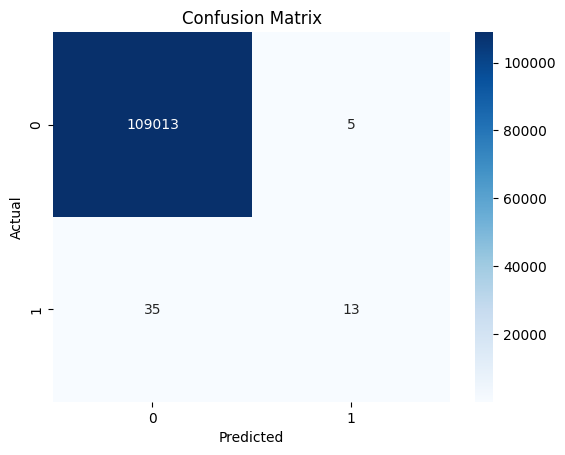

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]


ROC AUC Score: 0.9051


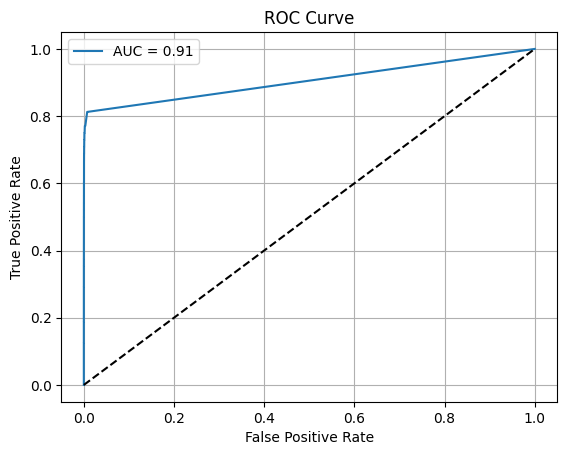

In [31]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


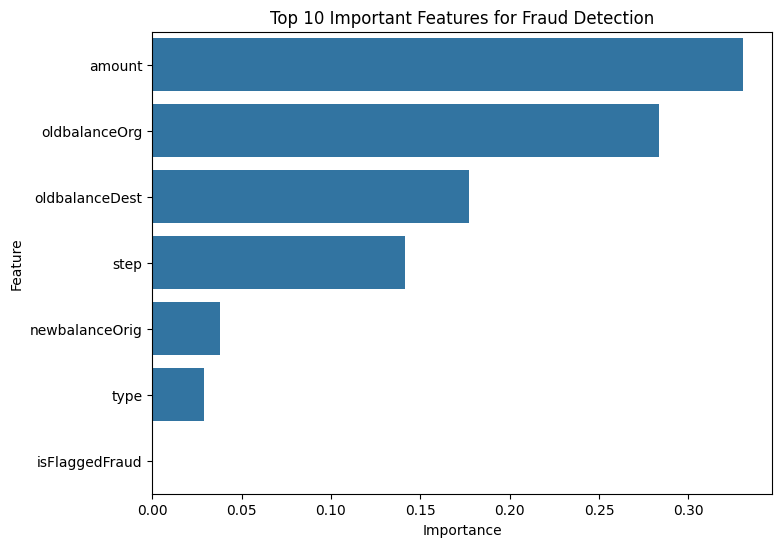

In [32]:
import numpy as np

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Important Features for Fraud Detection')
plt.show()


In [37]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9996332495919902
ROC-AUC: 0.9051363650956723

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    109018
         1.0       0.72      0.27      0.39        48

    accuracy                           1.00    109066
   macro avg       0.86      0.64      0.70    109066
weighted avg       1.00      1.00      1.00    109066

